# Importing dependancies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Data collection and Processing

In [2]:
#loading the (calories) data from csv file to a pandas Dataframe
calories=pd.read_csv(r'C:\Users\hp\Downloads\calories.csv')
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [3]:
#print 1st 5 rows 
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#loading the (exercise) data from csv file to a pandas Dataframe
exercise=pd.read_csv(r'C:\Users\hp\Downloads\archive (2)\exercise.csv')
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


# Combining the two Dataframes

In [5]:
calories_data=pd.concat([exercise,calories['Calories']],axis=1)
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [6]:
#checking the number of rows and columns
calories_data.shape

(15000, 9)

In [7]:
#getting info of data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
#checking for missing value
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
#get some statistical measurements about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Exploratory data analysis 

In [10]:
#replacing values of male and female with o and 1
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
sns.set()

In [12]:
#viewing types in gender and available count of it 
X=calories_data['Gender'].unique()
Y=calories_data['Gender'].value_counts()
print(X)
print(Y)

[0 1]
1    7553
0    7447
Name: Gender, dtype: int64


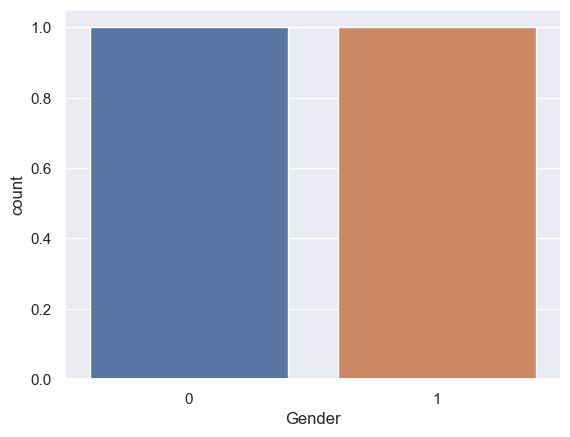

In [13]:
#plotting the gender column in count plot
sns.countplot(data= calories_data['Gender'],x=X)
plt.show()

# Finding the Correlation in the dataset

In [14]:
correlation=calories_data.corr()

<Axes: >

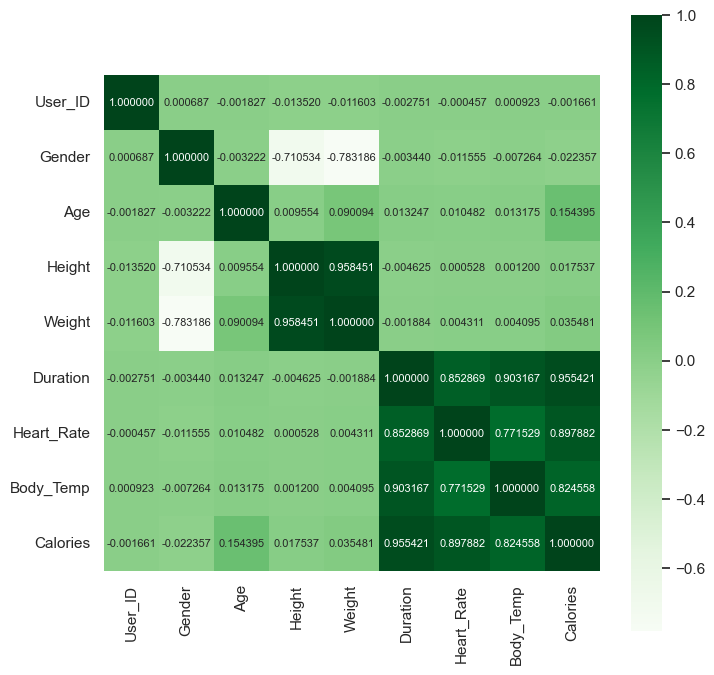

In [15]:
#constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='1f',annot=True,annot_kws={'size':8},cmap='Greens')

C:\Users\hp\AppData\Local\Temp\ipykernel_19164\2979167324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

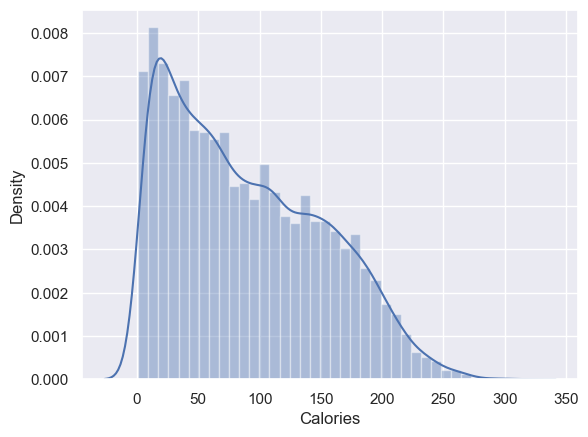

In [16]:
#finding the distribution of 'Calories' column
sns.distplot(calories_data['Calories'])

In [17]:
# Counting the occurrences of each gender
gender_counts = calories_data['Gender'].value_counts()

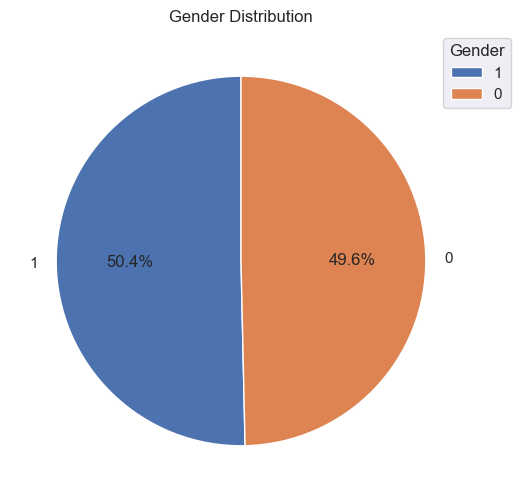

In [18]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

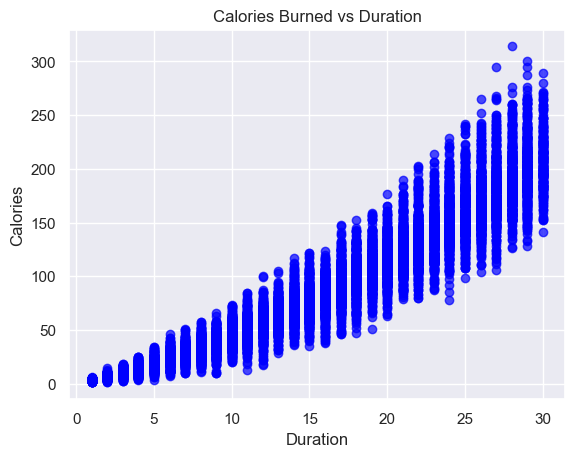

In [19]:
#Calories burnt in compared with duration
plt.scatter(calories_data['Duration'], calories_data['Calories'], color='blue', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Calories Burned vs Duration')
plt.grid(True)
plt.show()

# Separating features and Target

In [20]:
x=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [21]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [22]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


<Axes: ylabel='Calories'>

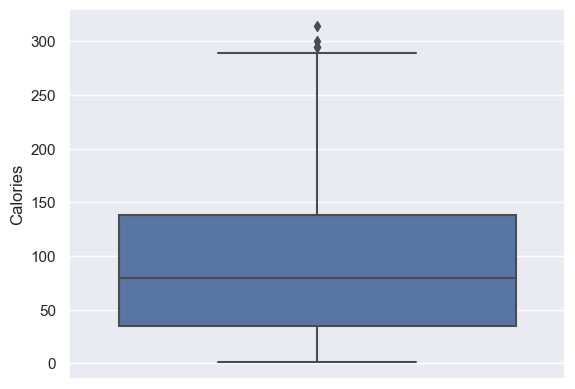

In [23]:
#Boxplot of targeted column
sns.boxplot(y='Calories',data=calories_data)

In [24]:
#removing outliars from calories column
calories_data[(calories_data["Calories"]>280)]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
428,13079051,0,75,199.0,103.0,28.0,123.0,40.5,314.0
3357,17825244,0,65,189.0,98.0,27.0,125.0,40.9,295.0
6240,17545969,0,69,193.0,90.0,29.0,121.0,41.1,300.0
9981,12114332,0,32,188.0,91.0,30.0,128.0,40.9,289.0
13871,10784322,0,75,178.0,76.0,29.0,120.0,40.8,295.0
14001,19360607,0,72,191.0,97.0,29.0,116.0,41.0,287.0


In [25]:
#Removing the outliars in calories column
calories_data.drop([428,3357,6240,9981,13871,14001],inplace=True)

<Axes: ylabel='Calories'>

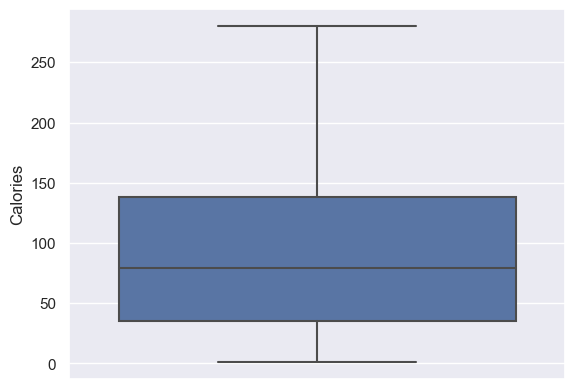

In [26]:
sns.boxplot(y='Calories',data=calories_data)

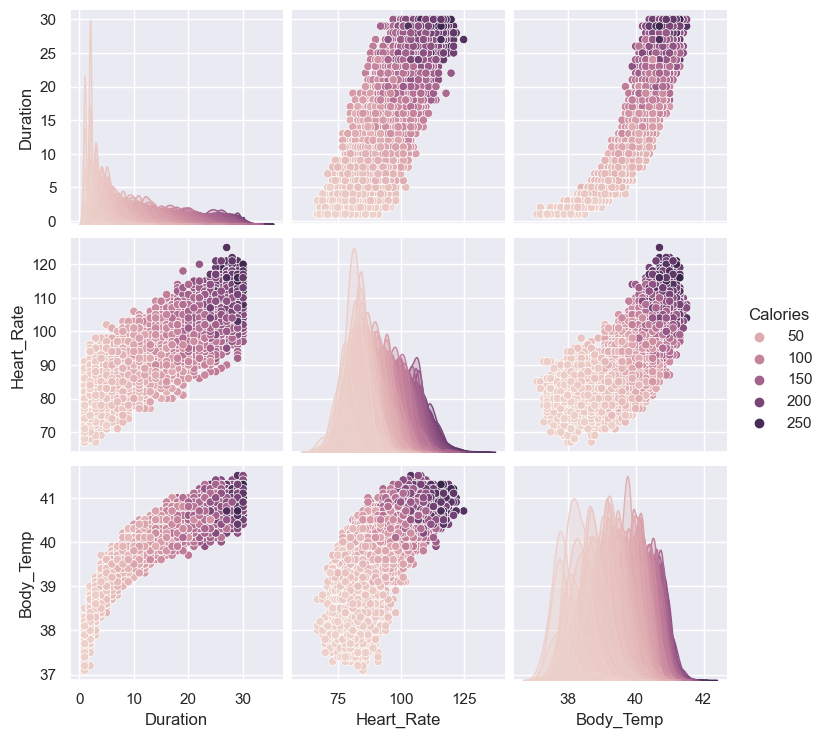

In [27]:
#observing the pairplot of each column with targeted column
sns.pairplot(calories_data[['Duration','Heart_Rate','Body_Temp','Calories']],hue='Calories')
plt.show()

# Splitting the data into training data and Test data

#### import importanat libraries for linear regression 

In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:

print(x.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model training

In [31]:
#loading the model
model=LinearRegression()

In [32]:
#training the model with X_train
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
#finding values of x_train 
predictions = model.predict(X_test)


In [34]:
print(predictions)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


In [35]:
#calculating the training data accuracy
mse = mean_squared_error(Y_test, predictions)
mae=mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared Score: {r2}")
print(mae)

Mean Squared Error: 130.08707386188377
Root Mean Squared Error: 11.405572053250278
R-squared Score: 0.9668790377181355
8.385188053147203


In [36]:
print(f"Mean absolute Error: {mae}")

Mean absolute Error: 8.385188053147203


# XGBoosting machine learning method

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:
#XGBoost Regressor
model=XGBRegressor()

In [45]:
#training the model with x_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
#Evaluation
test_data_prediction=model.predict(X_test)

In [47]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [48]:
#calculating the Mean Absolute Error
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [49]:
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.4833678883314132
